Рассчитанные относительные частоты угроз:

{
    '1.1': {'name': 'Перехват данных', 'frequency': 4, 'relative_frequency': 0.08},
    '1.2': {'name': 'Дублирование данных', 'frequency': 3, 'relative_frequency': 0.06},
    '1.3': {'name': 'Копирование данных', 'frequency': 3, 'relative_frequency': 0.06},
    '1.4': {'name': 'Утечка по акустическим каналам', 'frequency': 3, 'relative_frequency': 0.06},
    '1.5': {'name': 'Утечка по оптическому каналу', 'frequency': 3, 'relative_frequency': 0.06},
    '2.1': {'name': 'Ввод неверных данных', 'frequency': 4, 'relative_frequency': 0.08},
    '2.2': {'name': 'Искажение данных', 'frequency': 3, 'relative_frequency': 0.06},
    '2.3': {'name': 'Нарушение целостности', 'frequency': 3, 'relative_frequency': 0.06},
    '2.4': {'name': 'Подмена данных', 'frequency': 3, 'relative_frequency': 0.06},
    '2.5': {'name': 'Потеря данных', 'frequency': 1, 'relative_frequency': 0.02},
    '3.1': {'name': 'Отказ в доступе', 'frequency': 2, 'relative_frequency': 0.04},
    '3.2': {'name': 'Нарушение работы СКУД', 'frequency': 2, 'relative_frequency': 0.04},
    '3.3': {'name': 'Нарушение обмена информацией', 'frequency': 4, 'relative_frequency': 0.08},
    '3.4': {'name': 'Потеря электронных носителей', 'frequency': 2, 'relative_frequency': 0.04},
    '4.1': {'name': 'Нарушение целостности ПО', 'frequency': 3, 'relative_frequency': 0.06},
    '4.2': {'name': 'Кража средств обработки информации', 'frequency': 2, 'relative_frequency': 0.04},
    '4.3': {'name': 'Невозможность использования оборудования', 'frequency': 1, 'relative_frequency': 0.02},
    '4.4': {'name': 'Физическая порча линий связи', 'frequency': 1, 'relative_frequency': 0.02},
    '5.1': {'name': 'Утрата данных', 'frequency': 3, 'relative_frequency': 0.06}
}

Значимость уязвимостей (с учётом таблицы 2.1):

{
    '1.1': 0.08,
    '1.2': 0.14,
    '1.3': 0.14,
    '2.1': 0.14,
    '2.2': 0.12,
    '1.4': 0.06,
    '3.1': 0.1,
    '1.5': 0.06,
    '3.2': 0.1,
    '4.1': 0.14,
    '4.2': 0.06,
    '2.3': 0.06,
    '5.1': 0.18,
    '4.3': 0.04,
    '4.4': 0.04,
    '5.2': 0.06
}

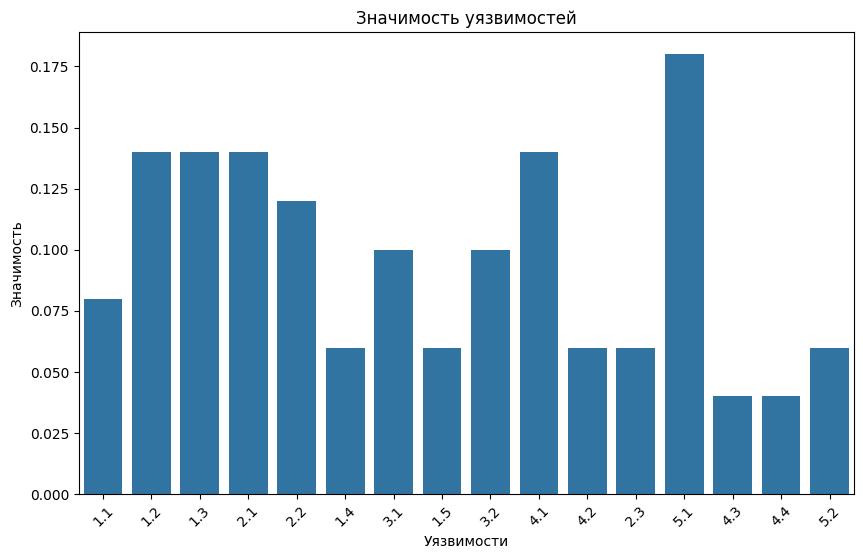

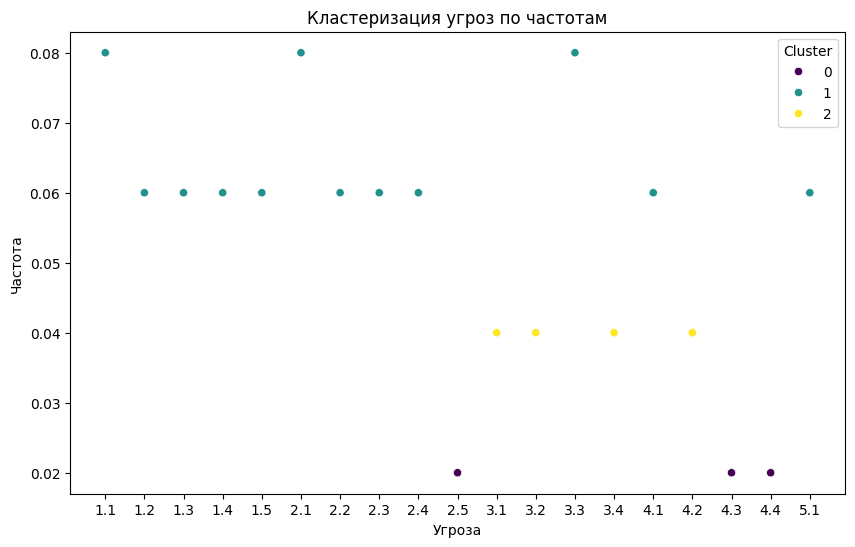

Матрица связей между угрозами и уязвимостями:

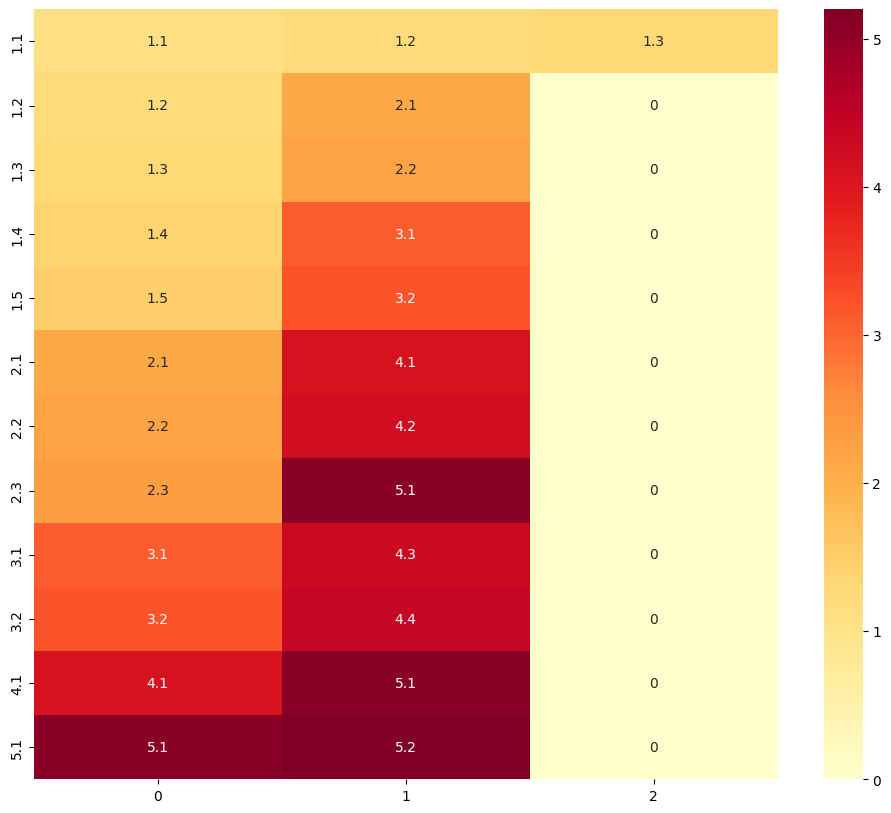

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print
from sklearn.cluster import KMeans

# 1. Активные уязвимости для варианта 11 на основе таблицы 2.1 (только уязвимости с "+")
active_vulnerabilities = {
    '1.1', '1.2', '1.3', '1.4', '1.5',  # Уязвимости физического типа
    '2.1', '2.2', '2.3', '2.4', '2.5',  # Уязвимости организационного типа
    '3.1', '3.2', '3.3', '3.4', '3.5', '3.6',  # Уязвимости технического типа
    '4.1', '4.2', '4.3', '4.4', '4.5',  # Уязвимости программного типа
    '5.1', '5.2'  # Уязвимости программно-аппаратного типа
}

# 2. Полный список уязвимостей по типам
vulnerabilities = {
    'physical': {
        '1.1': 'Отсутствие ограждения по периметру',
        '1.2': 'Низкое качество дверей',
        '1.3': 'Отсутствие решеток на окнах',
        '1.4': 'Слабая защита окон',
        '1.5': 'Недостатки в охранных системах'
    },
    'organizational': {
        '2.1': 'Некорректные должностные инструкции',
        '2.2': 'Неаттестованные помещения',
        '2.3': 'Некачественное разграничение доступа',
        '2.4': 'Проблемы с контролем доступа',
        '2.5': 'Отсутствие регулярного обучения'
    },
    'technical': {
        '3.1': 'Выход линий электропитания за пределы зоны',
        '3.2': 'Акустические утечки',
        '3.3': 'Нарушения в линиях связи',
        '3.4': 'Недостаток ИБП',
        '3.5': 'Недостаток систем видеонаблюдения',
        '3.6': 'Ошибки в охранных системах'
    },
    'software': {
        '4.1': 'Нелицензионное ПО',
        '4.2': 'Отсутствие криптографии',
        '4.3': 'Антивирусная защита',
        '4.4': 'Ошибки настройки МЭ',
        '4.5': 'Неправильное использование ПО'
    },
    'hardware': {
        '5.1': 'Неправильная аутентификация',
        '5.2': 'Низкое качество аппаратных средств'
    }
}

# 3. Таблица угроз (Таблица 2.7) с частотами для варианта 11
threats = {
    '1.1': {'name': 'Перехват данных', 'frequency': 4},
    '1.2': {'name': 'Дублирование данных', 'frequency': 3},
    '1.3': {'name': 'Копирование данных', 'frequency': 3},
    '1.4': {'name': 'Утечка по акустическим каналам', 'frequency': 3},
    '1.5': {'name': 'Утечка по оптическому каналу', 'frequency': 3},
    '2.1': {'name': 'Ввод неверных данных', 'frequency': 4},
    '2.2': {'name': 'Искажение данных', 'frequency': 3},
    '2.3': {'name': 'Нарушение целостности', 'frequency': 3},
    '2.4': {'name': 'Подмена данных', 'frequency': 3},
    '2.5': {'name': 'Потеря данных', 'frequency': 1},
    '3.1': {'name': 'Отказ в доступе', 'frequency': 2},
    '3.2': {'name': 'Нарушение работы СКУД', 'frequency': 2},
    '3.3': {'name': 'Нарушение обмена информацией', 'frequency': 4},
    '3.4': {'name': 'Потеря электронных носителей', 'frequency': 2},
    '4.1': {'name': 'Нарушение целостности ПО', 'frequency': 3},
    '4.2': {'name': 'Кража средств обработки информации', 'frequency': 2},
    '4.3': {'name': 'Невозможность использования оборудования', 'frequency': 1},
    '4.4': {'name': 'Физическая порча линий связи', 'frequency': 1},
    '5.1': {'name': 'Утрата данных', 'frequency': 3}
}

# 4. Матрица связей между угрозами и уязвимостями (Таблицы 2.8–2.15)
vuln_threat_matrix = {
    '1.1': ['1.1', '1.2', '1.3'],
    '1.2': ['1.2', '2.1'],
    '1.3': ['1.3', '2.2'],
    '1.4': ['1.4', '3.1'],
    '1.5': ['1.5', '3.2'],
    '2.1': ['2.1', '4.1'],
    '2.2': ['2.2', '4.2'],
    '2.3': ['2.3', '5.1'],
    '3.1': ['3.1', '4.3'],
    '3.2': ['3.2', '4.4'],
    '4.1': ['4.1', '5.1'],
    '5.1': ['5.1', '5.2']
}

# Функция расчёта относительных частот угроз
def calculate_relative_frequencies(threats):
    total_frequency = sum(threat['frequency'] for threat in threats.values())
    for key in threats:
        threats[key]['relative_frequency'] = threats[key]['frequency'] / total_frequency
    return threats

# Функция расчёта значимости уязвимостей с учётом активных уязвимостей для варианта 11
def calculate_vulnerability_significance(vuln_threat_matrix, threats, active_vulnerabilities):
    vuln_significance = {}
    for threat_id, vuln_ids in vuln_threat_matrix.items():
        threat_frequency = threats[threat_id]['relative_frequency']
        for vuln_id in vuln_ids:
            if vuln_id in active_vulnerabilities:
                if vuln_id in vuln_significance:
                    vuln_significance[vuln_id] += threat_frequency
                else:
                    vuln_significance[vuln_id] = threat_frequency
    return vuln_significance

# Кластеризация угроз
def cluster_threats(threats, n_clusters=3):
    threat_df = pd.DataFrame([
        (k, v['relative_frequency']) for k, v in threats.items()
    ], columns=['Threat', 'Frequency'])
    kmeans = KMeans(n_clusters=min(n_clusters, len(threat_df))).fit(threat_df[['Frequency']])
    threat_df['Cluster'] = kmeans.labels_
    return threat_df

# Визуализация кластеров угроз
def plot_clusters(clusters):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=clusters['Threat'], y=clusters['Frequency'], hue=clusters['Cluster'], palette="viridis")
    plt.title('Кластеризация угроз по частотам')
    plt.xlabel('Угроза')
    plt.ylabel('Частота')
    plt.show()

# Визуализация значимости уязвимостей
def plot_vulnerability_significance(vuln_significance):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(vuln_significance.keys()), y=list(vuln_significance.values()))
    plt.title('Значимость уязвимостей')
    plt.xlabel('Уязвимости')
    plt.ylabel('Значимость')
    plt.xticks(rotation=45)
    plt.show()

# Визуализация тепловой карты для связей
def plot_heatmap(matrix):
    # Преобразуем в DataFrame, заполняя пропуски нулями
    max_length = max(len(v) for v in matrix.values())
    formatted_matrix = {}
    for threat, vulns in matrix.items():
        # Добавляем нули, чтобы выровнять длину строк
        formatted_matrix[threat] = vulns + [0] * (max_length - len(vulns))

    # Создаем DataFrame и конвертируем все данные в float, заполняя None или другие некорректные значения
    df = pd.DataFrame(formatted_matrix).fillna(0).astype(float)
    df = df.transpose()  # Транспонируем для лучшей визуализации (угрозы по вертикали, уязвимости по горизонтали)
    
    # Отображаем тепловую карту
    plt.figure(figsize=(12, 10))
    sns.heatmap(df, annot=True, cmap="YlOrRd")
    plt.show()


# Запуск программы
if __name__ == "__main__":
    # Расчёт относительных частот угроз
    normalized_threats = calculate_relative_frequencies(threats)
    print("[bold cyan]Рассчитанные относительные частоты угроз:[/bold cyan]")
    print(normalized_threats)

    # Расчёт значимости уязвимостей с учётом активных уязвимостей (по таблице 2.1)
    vuln_significance = calculate_vulnerability_significance(vuln_threat_matrix, normalized_threats, active_vulnerabilities)
    print("[bold cyan]Значимость уязвимостей (с учётом таблицы 2.1):[/bold cyan]")
    print(vuln_significance)

    # Визуализация значимости уязвимостей
    plot_vulnerability_significance(vuln_significance)

    # Кластеризация угроз
    clusters = cluster_threats(normalized_threats)
    plot_clusters(clusters)

    # Визуализация матрицы связей
    print("[bold cyan]Матрица связей между угрозами и уязвимостями:[/bold cyan]")
    plot_heatmap(vuln_threat_matrix)
